# StatTutor Lab: Monthly Premiums of Auto Insurance

It is very unlikely that two drivers who have the same auto insurance with the same insurance company will have the same monthly premium since there are many factors (other than the type of insurance) that are taken into account when the monthly premium is calculated. 

In this exercise we will explore some of those factors by analyzing data that were collected from a random sample of 50 drivers insured with a certain company and having similar auto insurance coverage. For each driver the monthly premium was recorded along with other relevant information such as gender, age, driving experience, history of auto accidents, model and age of the car. Note that the data set for this exercise contains only a subset of the variables.

## Check the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib inline

In [2]:
data = pd.read_excel('auto_premiums.xls')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
Experience    50 non-null int64
Gender        50 non-null int64
Premium       50 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [5]:
data.head()

,Experience,Gender,Premium
0,1,1,73
1,6,0,74
2,15,1,37
3,20,0,45
4,3,0,68


**Experience**: Driving experience (in years)  
**Gender**: 0=male, 1=female  
**Premium**: The monthly premium (in dollars)

#### What is the monthly premium of the most experienced driver among the first ten drivers?

In [11]:
data[:10].loc[data.Experience == data.Experience.max()]

,Experience,Gender,Premium
3,20,0,45


#### What is the monthly premium of the least experienced female driver among the first ten drivers?

In [12]:
data[:10].loc[(data.Experience == data.Experience.min()) & (data.Gender == 1)]

,Experience,Gender,Premium
0,1,1,73


#### For the driver who pays the highest monthly premium among the first ten, what is the number of years that driver has been driving?

In [14]:
data[:10].loc[data.Premium == data[:10].Premium.max()]

,Experience,Gender,Premium
1,6,0,74


## Questions

#### Is the monthly premium related to the driver's experience?

This is a case of Q -> Q, quantitative explanatory and response variable, we use a linear regression test to see if there's a linear relationship between the monthly premium and the driver's experience. The hypothesis are:

Ho: There's no linear relationship between monthly premium and driver's experience  
Ha: There **is** a linear relationship between monthly permium and driver's experience

##### Regression t-test for the slope

In [17]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(data.loc[:, ['Experience', 'Premium']])

In [18]:
print(f'slope: {slope}\nintercept: {intercept}\nrvalue: {rvalue}\npvalue: {pvalue}\nstderr: {stderr}')

slope: -1.4490551148963962
intercept: 77.26768343287846
rvalue: -0.5229006408969318
pvalue: 9.78763057552609e-05
stderr: 0.34094577472845894


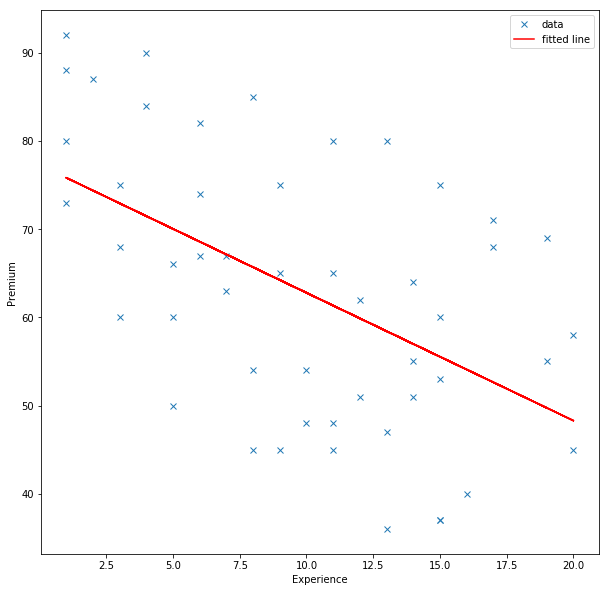

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
x = data.Experience
ax.set_xlabel('Experience')
ax.set_ylabel('Premium')
plt.plot(x, data.Premium, 'x', label='data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

There appear to be a moderate negative linear relationship r=-.52, no apparent outliers, with a p-value of 9.78763057552609e-05, we have strong evidence that what we are observing is not caused by sampling variability. Considering 5% significance test, we can reject Ho, and conclude that there is a linear relationship between driver's experience and monthly premium.

Althought we concluded that there's a linear relationship, the line does not fit very well, as the correlation is not strong, the data is very sparse, therefore the line is not a good way to make predictions.

#### It is well known that premiums of males (group 1) are generally higher than that of females (group 2). Do the data provide significant evidence to support that?

Here we have a case of C -> Q, categorical explanatory variable and quantitative response variable,  we like to compare two independent samples means. The hiphothesis are:

Ho: u1 - u2 = 0  
Ha: u1 - u2 > 0  

Where u1 is the mean for males and u2 for females.

In [37]:
gender_premium = data.loc[:, ['Gender', 'Premium']].pivot(columns='Gender')
gender_premium.describe()

Premium           
Gender          0          1
count   29.000000  21.000000
mean    69.034483  54.619048
std     11.938781  15.438511
min     45.000000  36.000000
25%     62.000000  45.000000
50%     68.000000  50.000000
75%     80.000000  60.000000
max     92.000000  88.000000

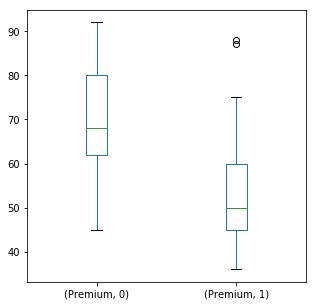

In [38]:
gender_premium.plot.box(figsize=(5, 5))

The box-plot shows that ther's no overlap between the two categories IQR, at first sight it appears that premium is in general higher for males.

#### T-test for two independent means

In [54]:
males = gender_premium.Premium.loc[:, 0]
females = gender_premium.Premium.loc[:, 1]
statistic, pval = st.ttest_ind(males, females, nan_policy='omit')

In [56]:
print(f'statistic: {statistic}, p-value: {pval/2}')

statistic: 3.724530923774904, p-value: 0.0002572836878555397


The test result p-value is very low, which means that the difference between the two means is not caused by sampling variability. We have strong evidence to reject Ho and conclude premiums for males is in general higher than it is for females.